In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


결측치 확인:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 327328038912.0000 - mae: 461695.9375 - val_loss: 63498465280.0000 - val_mae: 186390.8438
Epoch 2/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 64675020800.0000 - mae: 183160.9688 - val_loss: 45626560512.0000 - val_mae: 150938.8906
Epoch 3/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 49712869376.0000 - mae: 151628.2500 - val_loss: 34851659776.0000 - val_mae: 120980.5000
Epoch 4/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 37263577088.0000 - mae: 123988.2500 - val_loss: 31024261120.0000 - val_mae: 110740.8984
Epoch 5/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 35460419584.0000 - mae: 117412.2969 - val_loss: 29946222592.0000 - val_mae: 108620.7734
Epoch 6/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 36974854144.0000 - mae: 115519.5547 - val_loss: 29377423360.0000 - val_mae: 107292.6719
Epoch 7/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 33238855680.0000 - mae: 113299.2656 - val_loss: 290

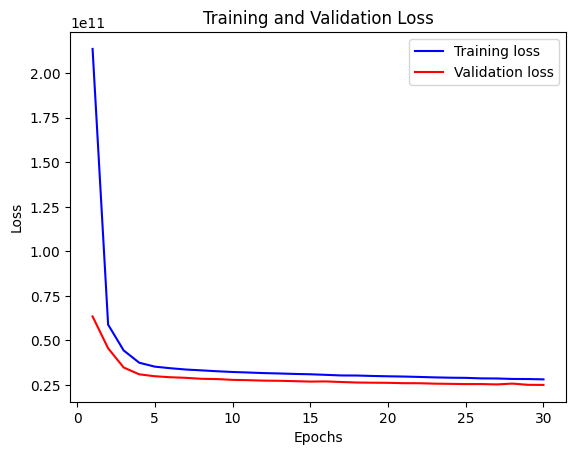

In [4]:
# kc_house 회귀

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = '/content/drive/My Drive/대학/2025-1/인공지능개론/dataset/kc_house_data.csv'
df = pd.read_csv(file_path)

# 2. 결측치 확인
print("결측치 확인:")
print(df.isnull().sum())

# 3. 필요 없는 열 제거 및 원-핫 인코딩
df = df.drop(columns=['id', 'date'])  # 예시로 제거 (상황에 따라 다를 수 있음)
df = pd.get_dummies(df, drop_first=True)

# 4. 특성과 레이블 분리
X = df.drop(columns=['price'])
y = df['price']

# 5. 정규화 (회귀에서 중요)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 6. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 7. 딥러닝 회귀 모델 정의
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 출력층 (회귀이므로 활성화 함수 없음)

# 8. 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

# 9. 모델 요약
model.summary()

# 10. 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 11. 손실 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


결측치 확인:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5577 - loss: 0.7148 - val_accuracy: 0.8361 - val_loss: 0.5809
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7943 - loss: 0.5563 - val_accuracy: 0.8361 - val_loss: 0.4442
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8187 - loss: 0.4559 - val_accuracy: 0.8852 - val_loss: 0.3382
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8503 - loss: 0.3745 - val_accuracy: 0.8689 - val_loss: 0.3023
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8673 - loss: 0.3371 - val_accuracy: 0.8852 - val_loss: 0.3162
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8341 - loss: 0.3467 - val_accuracy: 0.8852 - val_loss: 0.3268
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8340 - loss: 0.3303 - val_accuracy: 0.8852 - val_loss: 0.3286
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8537 - loss: 0.3174 - val_accuracy: 0.8852 - val_loss: 0.3223


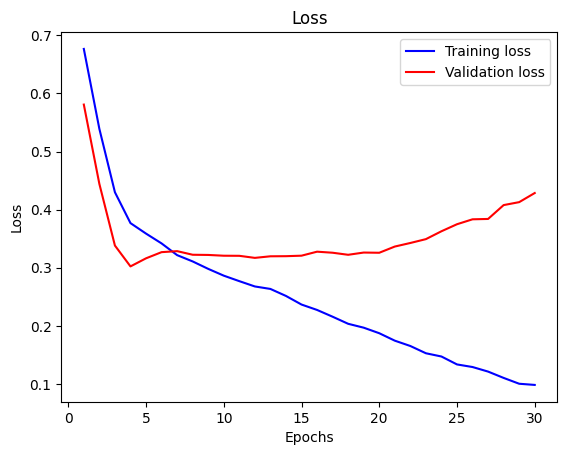

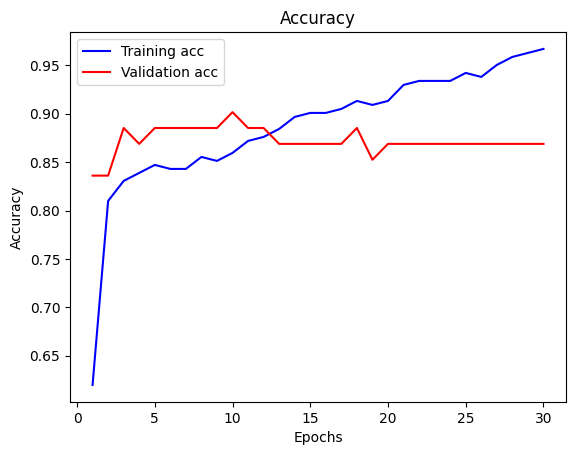

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61

[[22  5]
 [ 3 31]]


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# 1. 데이터 불러오기
file_path = '/content/drive/My Drive/대학/2025-1/인공지능개론/dataset/heart.csv'
df = pd.read_csv(file_path)

# 2. 결측치 확인
print("결측치 확인:")
print(df.isnull().sum())

# 3. 특성과 레이블 분리
X = df.drop(columns=['target'])
y = df['target']

# 4. 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 6. 모델 정의
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진 분류

# 7. 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# 8. 모델 요약
model.summary()

# 9. 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 10. 손실 및 정확도 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 11. 예측 및 평가
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))
